# Microsoft Movie Needs Analysis

**Authors:** Kyle Dufrane, Brian Matsiko, Ryan Reilly
***

![title](images/logo.jpeg)

## Overview

This project analyzes movie data from IMDb, The Numbers, and Box Office Mojo websites. The IMDb dataset includes data of over 38,000 movies. The Numbers dataset includes budget and revenue data of over 5,000 movies and the Box Office Mojo dataset includes revenue data of over 3,000 movies. Descriptive analysis of movie data shows that it is important to be slelective about certain attributes of the movie you create. 

## Business Problem

Microsoft is looking to develop an internal film department and needs clarity on how to be the most successful in the movie industry. Microsoft has never created a movie before. Choosing the first movie to make in this department is critical to their success in the movie industry. Through our analysis of various sources, we took a look at movies that were released in the last 10 years to get an idea of how recent movies have performed. Given that, we are going to provide recommendations to Microsoft based on the following: 

- Which studio to choose to distribute the movie
- Which director to choose 
- When to release the movie
- How much money to budget for the movie
- How long to make the movie


## Data Understanding

IMDb holds one of the most popular datasets about movie information. Each row in this dataset represents a unique movie and surrounding information about the movie. The Numbers dataset includes each unique movie along with budget and revenue numbers that will show us profitable a movie can be. The Box Office Mojo dataset includes domestic and foreign revenue for each movie but also includes the studio that distributed the move. Below are links to the sites that we pulled our data from.

[IMDb](https://www.imdb.com/interfaces/)

[The Numbers](https://www.the-numbers.com/)

[Box Office Mojo](https://www.boxofficemojo.com/)

#### Importing packages and loading the datasets

In [179]:
# Import standard packages

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [180]:
# Import data from sources

#Import The Numbers dataset
budgets = pd.read_csv('data/zippeddata/tn.movie_budgets.csv')

#Import the Box Office Mojo Data set
gross_df  = pd.read_csv('data/zippedData/bom.movie_gross.csv')

#Import the IMDB datasets
name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv')
title_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv')
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv')
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv')
title_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv')
title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv')

#### Get an understanding of each table

In [181]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Release date will need to be changed to a datetime and broken up into multiple date columns to dive deeper into when a movie was released.

In [182]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Foreign gross needs to be changed to a float. Studio names look to be abbreviated, so we will need to change them into the full studio name. 

#### For the IMDB tables below, nconst and tconst will be used as the primary and foriegn keys to join the tables into a final merged table.

In [183]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


We used all the missing values in the death year. If there was a value in the death year, we dropped it from this table. 

In [184]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [185]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


We are missing roughly 20 percent of the values in the runtime_minutes column. We decided to use the mean for any further analysis on this column.

In [186]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [187]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [188]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Data Preparation

### Budgets Data

In [189]:
#View the first 5 rows
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [190]:
#Checking for NAs
budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [191]:
#Checking for duplicates
budgets.duplicated().sum()

0

In [192]:
#Change date column to DateTime
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

#Change money columns to int
budgets['production_budget'] = budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [193]:
#View stats on the numeric columns
budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


### Studio Data

In [194]:
#View the first 5 rows
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [195]:
#Checking for NAs
gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [196]:
#Checking for duplicates
gross_df.duplicated().sum()

0

In [197]:
#Replacing the comma values in "foreign-gross"
gross_df['foreign_gross'].replace(',','', regex=True, inplace=True)

In [198]:
#Convert foreign-gross to float
gross_df["foreign_gross"]= gross_df['foreign_gross'].astype(float)

In [199]:
#renaming studios to easy readibility
gross_df['studio'].replace({'BV':'Walt Disney','WB':'Warner Bros.','P/DW':'Dream Works','Par.': 'Paramount', 
                           'Uni.': 'Universal','LGF' :'Lionsgate', 'SPC':'Sony',
                           'Magn.':'Magnolia', 'WB (NL)':'Warner Bros.', 'LG/S':'Lionsgate'}, inplace=True)

In [200]:
#View stats on the numeric columns
gross_df.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


### IMDB Data

View top 5 rows

In [201]:
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [202]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [203]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [204]:
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [205]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [206]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Check for NAs

In [207]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [208]:
title_akas.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [209]:
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [210]:
title_crew.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

In [211]:
title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [212]:
title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

Check for Duplicates

In [213]:
name_basics.duplicated().sum()

0

In [214]:
title_akas.duplicated().sum()

0

In [215]:
title_basics.duplicated().sum()

0

In [216]:
title_crew.duplicated().sum()

0

In [217]:
title_principals.duplicated().sum()

0

In [218]:
title_ratings.duplicated().sum()

0

## Data Cleaning

In [219]:
# Removing deceases column in IMDB name_basics
name_basics = name_basics[(name_basics['death_year'].isna())]

In [220]:
# Renaming first column in IMDB titles_akas to match merge
title_akas.rename(columns = {'title_id':'tconst'},inplace=True)

In [221]:
# Replacing the runtime_minutes with the mean of the column since we're only missing 20% of our data in IMDB title_basics
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean(), inplace=True)

Merging IMDB Tables

In [222]:
# Merge name_basics and title_principals
name_principals = pd.merge(name_basics, title_principals, on='nconst')

In [223]:
# Merge name_principals with title_ratings
name_principals_ratings = pd.merge(name_principals, title_ratings, on='tconst')

In [224]:
# Merge title_crew to name_principals
name_principals_ratings_crew = pd.merge(title_crew, name_principals_ratings, on='tconst')

In [225]:
# Merge titles_basics to name_principals
name_principals_ratings_crew_basics = pd.merge(title_basics, name_principals_ratings_crew, on='tconst')

In [226]:
# Final merge using title_akas and name_principals_ratings_crew_basics
final_merge = pd.merge(title_akas, name_principals_ratings_crew_basics, on='tconst')

# Feature Engineering

In [227]:
# Add a profit column to Budgets
budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']

In [228]:
# Add year, month, month_num, day, day_of_week and day_of_week num columns to Budgets
budgets['year'] = budgets['release_date'].dt.year
budgets['month'] = budgets['release_date'].dt.month_name()
budgets['month_num'] = budgets['release_date'].dt.month
budgets['day'] = budgets['release_date'].dt.day
budgets['day_of_week'] = budgets['release_date'].dt.day_name()
budgets['day_of_week_num'] = budgets['release_date'].dt.dayofweek

In [229]:
# Add a Total Gross column to Studios
gross_df['Total Gross Revenue']=gross_df['domestic_gross'] + gross_df['foreign_gross']

# Analysis

In [230]:
# Set the style of the graphs for analysis
mpl.style.use('fivethirtyeight')

#### Should Microsoft consider what time of year to release the first movie in order to make the most money?

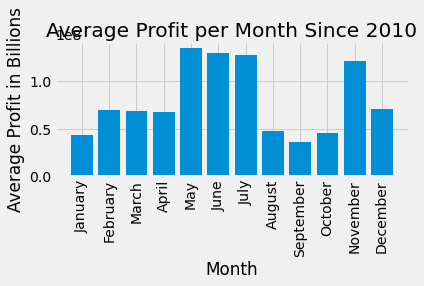

In [231]:
#Create an average profit by month bar chart

fig, ax2 = plt.subplots()

budgets2 = budgets[budgets['year'] > 2010]

y2 = budgets2.groupby(['month_num','month'])['profit'].mean().values
x2 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax2.bar(x2,y2)

ax2.tick_params(axis='x', labelrotation = 90)

ax2.set_title('Average Profit per Month Since 2010')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Profit in Billions')

plt.tight_layout()

fig.savefig('images/profit_per_month.png');

#### Can we relate the top 5 movies in the most profitable months to our top Genres/Studios/and Directors?

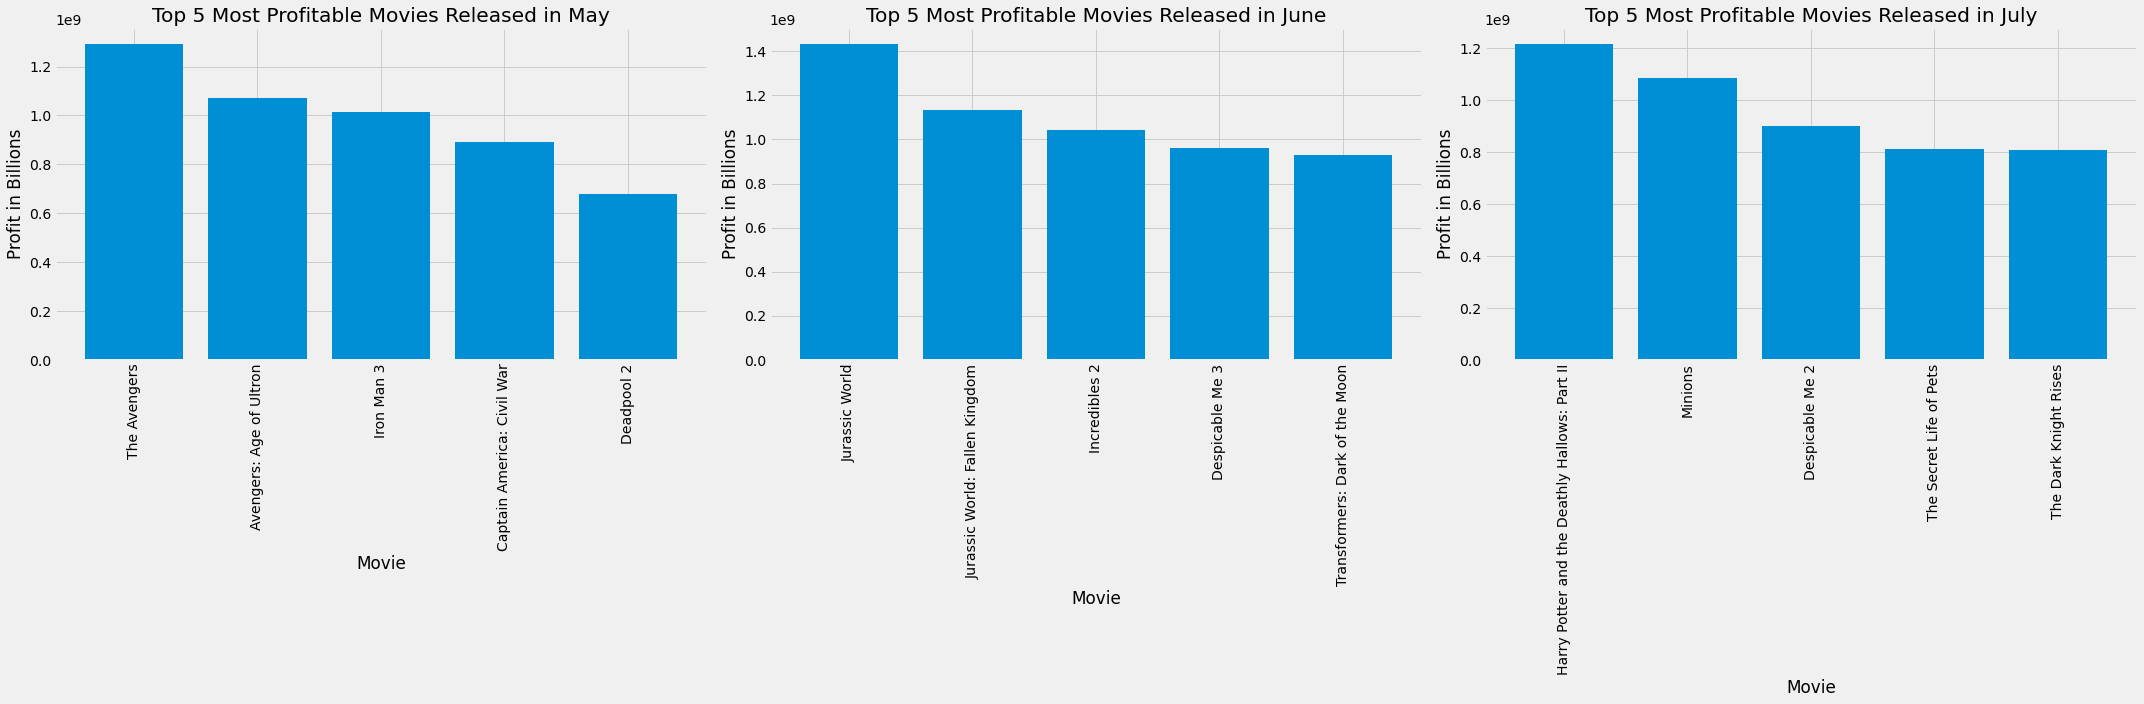

In [232]:
#Create a bar chart of the top 5 most profitable movies in the top 3 most profitable months

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (30,10))


high_profit = budgets[(budgets['month'] == 'May') | (budgets['month'] == 'June') | (budgets['month'] == 'July')]

since2010 = high_profit[high_profit['year'] > 2010].sort_values('profit', ascending = False)

may = since2010[since2010['month'] == 'May'].sort_values('profit', ascending = False)
june = since2010[since2010['month'] == 'June'].sort_values('profit', ascending = False)
july = since2010[since2010['month'] == 'July'].sort_values('profit', ascending = False)

#May

x1 = may['movie'][0:5]
y1 = may['profit'][0:5]

ax1.bar(x1,y1)

ax1.set_title('Top 5 Most Profitable Movies Released in May')
ax1.set_xlabel('Movie')
ax1.set_ylabel('Profit in Billions')
ax1.tick_params(axis='x', labelrotation = 90)


#June

x2 = june['movie'][0:5]
y2 = june['profit'][0:5]

ax2.bar(x2,y2)

ax2.set_title('Top 5 Most Profitable Movies Released in June')
ax2.set_xlabel('Movie')
ax2.set_ylabel('Profit in Billions')
ax2.tick_params(axis='x', labelrotation = 90)

#July

x3 = july['movie'][0:5]
y3 = july['profit'][0:5]

ax3.bar(x3,y3)

ax3.set_title('Top 5 Most Profitable Movies Released in July')
ax3.set_xlabel('Movie')
ax3.set_ylabel('Profit in Billions')
ax3.tick_params(axis='x', labelrotation = 90)

plt.tight_layout()
fig.savefig('images/most_profitable_movies.png');

#### Do you need to spend more money to make more money on your first film?

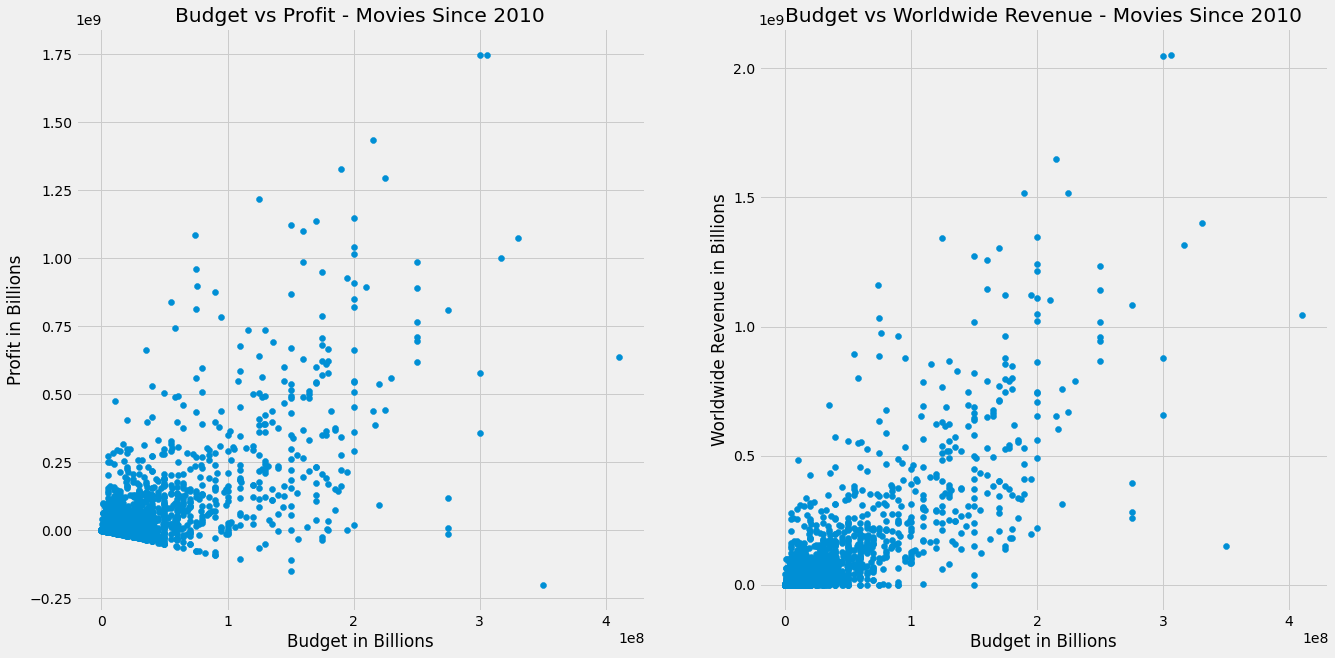

In [233]:
#Create two charts, one that shows budget vs profit and the other that shows budget vs worldwide revenue

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,10))

#Budget vs Profit
After2010 = budgets[budgets['year'] > 2010]

y1 = After2010['profit']
x1 = After2010['production_budget']

ax1.scatter(x1,y1)

ax1.set_title('Budget vs Profit - Movies Since 2010')
ax1.set_xlabel('Budget in Billions')
ax1.set_ylabel('Profit in Billions')

#Budget vs Revenue

y2 = After2010['worldwide_gross']
x2 = After2010['production_budget']


ax2.scatter(x2,y2)

ax2.set_title('Budget vs Worldwide Revenue - Movies Since 2010')
ax2.set_xlabel('Budget in Billions')
ax2.set_ylabel('Worldwide Revenue in Billions')

fig.savefig('images/budget_profit_revenue.png');

#### How much money can you expect to spend on a top Movie?

In [234]:
#Create a chart of the budgets of the top 5 most profitable movies released in May. Then create an average budget number.

#Isolate the movies releases after 2010
budgets2010 = budgets[budgets['year'] > 2010].sort_values('production_budget', ascending = False)

# Createa a table that shows the top 5 most profitable movies released in May and the respective budgets
titles = ['The Avengers', 'Avengers: Age of Ultron', 'Iron Man 3', 'Captain America: Civil War', 'Deadpool 2']
MayTopBudgets = budgets2010[budgets2010['movie'].isin(titles)]

New = MayTopBudgets[['movie', 'production_budget']]

#Create an Average Budget row
New.loc['Average Budget'] = New.mean()
New.reset_index()

,index,movie,production_budget
0,3,Avengers: Age of Ultron,330600000.0
1,16,Captain America: Civil War,250000000.0
2,26,The Avengers,225000000.0
3,47,Iron Man 3,200000000.0
4,314,Deadpool 2,110000000.0
5,Average Budget,NaN,223120000.0


#### Which studio should you work with if you are looking to maximize revenue?

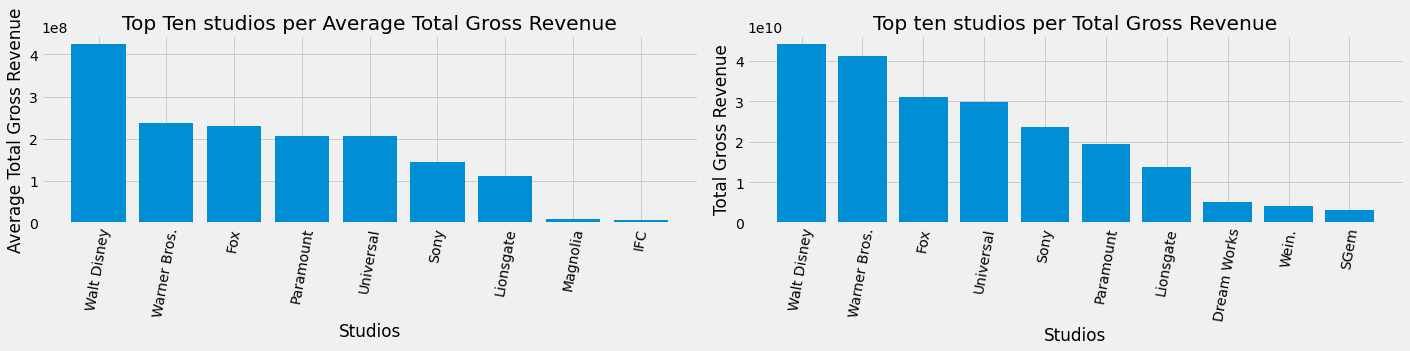

In [235]:
#Barchart for the mean total gross of the studios that made more than 100 titles

fig1, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))

#Filtering the studios by the ones that made more than 100 titles / moives
main_st_df= gross_df[gross_df["studio"].map(gross_df['studio'].value_counts()) > 100]
main_st_df

x1= main_st_df.groupby('studio')['Total Gross Revenue'].mean().sort_values(ascending=False)[:10].index
y1= main_st_df.groupby('studio')['Total Gross Revenue'].mean().sort_values(ascending=False)[:10].values
ax1.bar(x1,y1)
ax1.tick_params(axis='x', labelrotation=80)
ax1.set_xlabel("Studios")
ax1.set_ylabel("Average Total Gross Revenue")
ax1.set_title('Top Ten studios per Average Total Gross Revenue')

# Top studios by total revenue
x2= gross_df.groupby('studio')['Total Gross Revenue'].sum().sort_values(ascending=False)[:10].index
y2= gross_df.groupby('studio')['Total Gross Revenue'].sum().sort_values(ascending=False)[:10].values
ax2.tick_params(axis='x', labelrotation=80)
ax2.set_xlabel("Studios")
ax2.set_ylabel("Total Gross Revenue")
ax2.set_title('Top ten studios per Total Gross Revenue')
ax2.bar(x2,y2)

plt.tight_layout()

fig1.savefig('images/top_studios_revenue.png');

The below chart shows the top 10 grossing films by total gross revenue

In [236]:
# Top 10 movies by Total Gross Revenue

top_gross_dom_df= gross_df.sort_values('Total Gross Revenue', ascending=False)
top_gross_dom_df[:10]

,title,studio,domestic_gross,foreign_gross,year,Total Gross Revenue
727,Marvel's The Avengers,Walt Disney,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,Walt Disney,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,Walt Disney,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,Walt Disney,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Universal,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,Walt Disney,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),Walt Disney,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,Walt Disney,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,Walt Disney,409000000.0,805800000.0,2013,1.214800e+09


#### Which genres should you consider when making the best movie by rating?

Top 10 Genres

In [237]:

def top_10_genres(genre):
    # Filtering genres by value counts
    list_of_genres = final_merge['genres'].value_counts()[:50]
    
    #All genres with a total number of votes greater than 30000
    all_genres  = genre[(genre['genres'].isin(list_of_genres.index)) &\
                         (genre['numvotes'] >= 30000)&\
                         (genre['start_year'] >= 2010)]
    
    #Drop duplicating tconst values
    all_genres_drop_dup = all_genres.drop_duplicates(subset = 'tconst')
    
    #Filtering genre value counts based on above filter
    all_genre = all_genres_drop_dup['genres'].value_counts()
   
    #Filtering genres based on total value counts greater than their mean
    all_genres_greater_mean = all_genre.values >= all_genre.values.mean()

    #Filtering genres with a count over 20 against the all_genres filter
    the_genres_name = all_genre[all_genres_greater_mean]

    #Filtering the_genres_name against the complete dataset
    filter_with_full_table = all_genres[(all_genres['genres'].isin(the_genres_name.index))]

    #Creating a table of top 10 genres
    top_10_genres = pd.DataFrame(filter_with_full_table.groupby('genres')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_genres = top_10_genres.reset_index()
    
    #Finding results    
    return top_10_genres

Overall 

In [238]:
top_10_genres(final_merge)

,genres,averagerating
0,Drama,7.371872
1,"Drama,Romance",7.087556
2,"Drama,Thriller",6.969435
3,"Comedy,Drama",6.919110
4,"Crime,Drama,Mystery",6.917820
5,"Action,Adventure,Sci-Fi",6.853863
6,"Action,Adventure,Comedy",6.848740
7,"Action,Crime,Drama",6.836318
8,"Action,Crime,Thriller",6.796699
9,"Adventure,Animation,Comedy",6.782954


US

In [239]:
top_10_genres_us = final_merge[final_merge['region'] == 'US']
top_10_genres(top_10_genres_us)

,genres,averagerating
0,Drama,7.286364
1,"Action,Adventure,Comedy",6.993930
2,"Drama,Romance",6.973913
3,"Action,Adventure,Sci-Fi",6.913205
4,"Crime,Drama,Mystery",6.907422
5,"Action,Thriller",6.845392
6,"Crime,Drama,Thriller",6.837705
7,"Drama,Thriller",6.834653
8,"Action,Crime,Thriller",6.809719
9,"Comedy,Drama",6.768126


Foreign

In [240]:
top_10_foreign_genres = final_merge[final_merge['region'] != 'US']
top_10_genres(top_10_foreign_genres)

,genres,averagerating
0,Drama,7.374972
1,"Drama,Romance",7.091947
2,"Drama,Thriller",6.974009
3,"Comedy,Drama",6.927646
4,"Crime,Drama,Mystery",6.918273
5,"Action,Adventure,Sci-Fi",6.848960
6,"Action,Crime,Drama",6.839337
7,"Action,Adventure,Comedy",6.836142
8,"Action,Crime,Thriller",6.796065
9,"Adventure,Animation,Comedy",6.788173


#### Which directors should you consider when making the best movie by rating?

Top 10 Directors

In [241]:
def top_10_directors(directors):
    
    #All directors with a total number of votes greater than 30000
    all_directors  = directors[(directors['category'] == 'director') &\
                         (directors['numvotes'] >= 30000)&\
                         (directors['start_year'] >= 2010)]
    
    #Drop duplicating tconst values
    all_directors_drop_dup = all_directors.drop_duplicates(subset = 'tconst')
    
    #Filtering directors value counts based on above filter
    all_director = all_directors_drop_dup['primary_name'].value_counts()
   
    #Filtering directors based on total value counts greater than their mean
    all_director_greater_mean = all_director.values >= all_director.values.mean()

    #Filtering directors with a count over 20 against the all_genres filter
    the_directors_name = all_director[all_director_greater_mean]

    #Filtering the_directors_name against the complete dataset
    filter_with_full_table_director = all_directors[(all_directors['primary_name'].isin(the_directors_name.index))]

    #Creating a table of top 10 genres
    top_10_directors = pd.DataFrame(filter_with_full_table_director.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_directors = top_10_directors.reset_index()
   
    #Finding results    
    return top_10_directors

Overall

In [242]:
top_10_directors_xww = final_merge
top_10_directors(top_10_directors_xww)

,primary_name,averagerating
0,Christopher Nolan,8.455215
1,Lee Unkrich,8.348611
2,S.S. Rajamouli,8.193333
3,Joe Russo,8.192593
4,Asif Kapadia,8.148718
5,Quentin Tarantino,8.096104
6,Nuri Bilge Ceylan,8.066667
7,Rajkumar Hirani,8.041176
8,Stephen Chbosky,8.000000
9,Neeraj Pandey,8.000000


US

In [243]:
top_10_directors_us = final_merge[final_merge['region'] == 'US']
top_10_directors(top_10_directors_us)

,primary_name,averagerating
0,Christopher Nolan,8.452941
1,Lee Unkrich,8.340000
2,Joe Russo,8.141176
3,Peter Ramsey,8.100000
4,Stephen Chbosky,8.000000
5,Damien Chazelle,7.975000
6,Quentin Tarantino,7.950000
7,Wes Anderson,7.933333
8,Oriol Paulo,7.933333
9,Denis Villeneuve,7.855556


Foreign

In [244]:
top_10_directors_foreign = final_merge[final_merge['region'] != 'US']
top_10_directors(top_10_directors_foreign)

,primary_name,averagerating
0,Christopher Nolan,8.455479
1,Lee Unkrich,8.349254
2,Joe Russo,8.198621
3,S.S. Rajamouli,8.193333
4,Asif Kapadia,8.148718
5,Quentin Tarantino,8.104110
6,Nuri Bilge Ceylan,8.066667
7,Rajkumar Hirani,8.041176
8,Stephen Chbosky,8.000000
9,Neeraj Pandey,8.000000


#### Which writers should you consider when making the best movie by rating?

Top 10 Writers

In [245]:
def top_10_writers(writers):
    
    #All writers with a total number of votes greater than 30000
    all_writers  = writers[(writers['category'] == 'director') &\
                         (writers['numvotes'] >= 30000)&\
                         (writers['start_year'] >= 2010)]
    
    #Drop duplicating tconst values
    all_writers_drop_dup = all_writers.drop_duplicates(subset = 'tconst')
    
    #Filtering writers value counts based on above filter
    all_writer = all_writers_drop_dup['primary_name'].value_counts()
   
    #Filtering writers based on total value counts greater than their mean
    all_writer_greater_mean = all_writer.values >= all_writer.values.mean()

    #Filtering writers with a count over 20 against the all_genres filter
    the_writer_name = all_writer[all_writer_greater_mean]

    #Filtering the_writers_name against the complete dataset
    filter_with_full_table_writer = all_writers[(all_writers['primary_name'].isin(the_writer_name.index))]

    #Creating a table of top 10 genres
    top_10_writers = pd.DataFrame(filter_with_full_table_writer.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_writers = top_10_writers.reset_index()
    #Returning results    
    return top_10_writers

Overall

In [246]:
top_10_writers_xww = final_merge
top_10_writers(top_10_directors_xww)

,primary_name,averagerating
0,Christopher Nolan,8.455215
1,Lee Unkrich,8.348611
2,S.S. Rajamouli,8.193333
3,Joe Russo,8.192593
4,Asif Kapadia,8.148718
5,Quentin Tarantino,8.096104
6,Nuri Bilge Ceylan,8.066667
7,Rajkumar Hirani,8.041176
8,Stephen Chbosky,8.000000
9,Neeraj Pandey,8.000000


US

In [247]:
top_10_writers_us = final_merge[final_merge['region'] == 'US']
top_10_writers(top_10_writers_us)

,primary_name,averagerating
0,Christopher Nolan,8.452941
1,Lee Unkrich,8.340000
2,Joe Russo,8.141176
3,Peter Ramsey,8.100000
4,Stephen Chbosky,8.000000
5,Damien Chazelle,7.975000
6,Quentin Tarantino,7.950000
7,Wes Anderson,7.933333
8,Oriol Paulo,7.933333
9,Denis Villeneuve,7.855556


Foreign

In [248]:
top_10_writers_foreign = final_merge[final_merge['region'] != 'US']
top_10_writers(top_10_writers_foreign)

,primary_name,averagerating
0,Christopher Nolan,8.455479
1,Lee Unkrich,8.349254
2,Joe Russo,8.198621
3,S.S. Rajamouli,8.193333
4,Asif Kapadia,8.148718
5,Quentin Tarantino,8.104110
6,Nuri Bilge Ceylan,8.066667
7,Rajkumar Hirani,8.041176
8,Stephen Chbosky,8.000000
9,Neeraj Pandey,8.000000


#### Which actors should you consider when making the best movie by rating?

Top 10 Actors

In [249]:
def top_10_actor(actor):
    
    #All actors with a total number of votes greater than 30000
    all_actors = actor[(actor['category'] == 'actor') &\
                         (actor['numvotes'] >= 30000)&\
                         (actor['start_year'] >= 2010)]
    #Drop duplicating tconst values
    all_actors_drop_dup = all_actors.drop_duplicates(subset = 'tconst')
    
    #Filtering actors value counts based on above filter
    all_actor = all_actors_drop_dup['primary_name'].value_counts()
   
    #Filtering actors based on total value counts greater than their mean
    all_actor_greater_mean = all_actor.values >= all_actor.values.mean()

    #Filtering actors with a count over 20 against the all_genres filter
    the_actor_name = all_actor[all_actor_greater_mean]

    #Filtering the_actors_name against the complete dataset
    filter_with_full_table_actor = all_actors[(all_actors['primary_name'].isin(the_actor_name.index))]

    #Creating a table of top 10 genres
    top_10_actor = pd.DataFrame(filter_with_full_table_actor.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_actor = top_10_actor.reset_index()
    
    #Returning results    
    return top_10_actor

Overall

In [250]:
top_10_actors_xww = final_merge
top_10_actor(top_10_actors_xww)

,primary_name,averagerating
0,Paresh Rawal,8.165000
1,Akshay Kumar,8.085714
2,Jose Coronado,7.863158
3,F. Murray Abraham,7.843750
4,Patrick Stewart,7.825581
5,Mahershala Ali,7.786792
6,Rupert Grint,7.717886
7,Ian McKellen,7.676355
8,Mark Ruffalo,7.650928
9,Sathyaraj,7.623810


US

In [251]:
top_10_actors_us = final_merge[final_merge['region'] == 'US']
top_10_actor(top_10_actors_us)

,primary_name,averagerating
0,Paresh Rawal,8.400000
1,Viggo Mortensen,8.100000
2,Rupert Grint,8.000000
3,Jose Coronado,7.933333
4,Mark Ruffalo,7.854545
5,Patrick Stewart,7.820000
6,Gael García Bernal,7.800000
7,Mahershala Ali,7.800000
8,Ian McKellen,7.788889
9,F. Murray Abraham,7.725000


Foreign

In [252]:
top_10_actors_foreign = final_merge[final_merge['region'] != 'US']
top_10_actor(top_10_actors_foreign)

,primary_name,averagerating
0,Paresh Rawal,8.138889
1,Akshay Kumar,8.084211
2,Jose Coronado,7.857143
3,F. Murray Abraham,7.850000
4,Patrick Stewart,7.825926
5,Mahershala Ali,7.786184
6,Rupert Grint,7.708403
7,Ian McKellen,7.671134
8,Mark Ruffalo,7.638310
9,Sathyaraj,7.623810


#### Which actresses should you consider when making the best movie by rating?

Top 10 Actresses

In [253]:
def top_10_actress(actress):
    
    #All actresses with a total number of votes greater than 30000
    all_actresses = actress[(actress['category'] == 'actress') &\
                         (actress['numvotes'] >= 30000)&\
                         (actress['start_year'] >= 2010)]
    
    #Drop duplicating tconst values
    all_actresses_drop_dup = all_actresses.drop_duplicates(subset = 'tconst')
    
    #Filtering actresses value counts based on above filter
    all_actress = all_actresses_drop_dup['primary_name'].value_counts()
   
    #Filtering actresses based on total value counts greater than their mean
    all_actress_greater_mean = all_actress.values >= all_actress.values.mean()

    #Filtering actresses with a count over 20 against the all_genres filter
    the_actress_name = all_actress[all_actress_greater_mean]

    #Filtering the_actress_name against the complete dataset
    filter_with_full_table_actress = all_actresses[(all_actresses['primary_name'].isin(the_actress_name.index))]

    #Creating a table of top 10 genres
    top_10_actress = pd.DataFrame(filter_with_full_table_actress.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_actress = top_10_actress.reset_index()
    
    #Returning results    
    return top_10_actress

Overall

In [254]:
top_10_actress_xww = final_merge
top_10_actress(top_10_actress_xww)

,primary_name,averagerating
0,Taapsee Pannu,8.114286
1,Tabu,8.080645
2,Morena Baccarin,7.898462
3,Holly Hunter,7.663934
4,Trine Dyrholm,7.600000
5,America Ferrera,7.600000
6,Daisy Ridley,7.599091
7,Karin Konoval,7.557143
8,Agata Kulesza,7.512727
9,Kerry Washington,7.510169


US

In [255]:
top_10_actress_us = final_merge[final_merge['region'] == 'US']
top_10_actress(top_10_actress_us)

,primary_name,averagerating
0,Tabu,8.200000
1,Morena Baccarin,7.883333
2,Holly Hunter,7.666667
3,America Ferrera,7.600000
4,Trine Dyrholm,7.600000
5,Karin Konoval,7.575000
6,Frances McDormand,7.542857
7,Daisy Ridley,7.460000
8,Lynn Xiong,7.433333
9,Jessica Chastain,7.412500


Foreign

In [256]:
top_10_actress_foreign = final_merge[final_merge['region'] != 'US']
top_10_actress(top_10_actress_foreign)

,primary_name,averagerating
0,Taapsee Pannu,8.114286
1,Tabu,8.076667
2,Morena Baccarin,7.901887
3,Holly Hunter,7.663793
4,Daisy Ridley,7.605714
5,Trine Dyrholm,7.600000
6,America Ferrera,7.600000
7,Karin Konoval,7.555263
8,Kerry Washington,7.522807
9,Agata Kulesza,7.511111


#### How long should your first movie be?

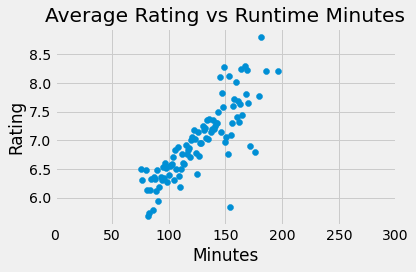

In [258]:
#Create scatter of relationship between runtime minutes and ratings.

fig, ax = plt.subplots()

total_mean_votes = final_merge[final_merge['numvotes'] >= 30000]

avg_rating = total_mean_votes.groupby('runtime_minutes').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)

x = avg_rating['runtime_minutes']
y = avg_rating['averagerating']

ax.scatter(x,y)

ax.set_title('Average Rating vs Runtime Minutes')
ax.set_xlabel('Minutes')
ax.set_ylabel('Rating')
plt.xlim(0, 300)
plt.tight_layout()

fig.savefig('images/rating_runtime_minutes.png');

# Conclusions

This analysis leads to the following recommendations for creating a movie.

**1. Engage with the top studios (Walt Disney and Warner Bros) who generate the most revenue per movie.** 

These  studios have the highest average grossing revenue for those studios who have made over 100 movies. During May, which is the most profitable month of the year, Walt Disney distributed the top 5 highest profitable movies while Warner Brothers  distributed top movies by profit in June and July, the 2nd and 3rd highest average profit months respectively.

**2. Engage with the top directors (Christopher Nolan, Lee Unkrich, S.S. Rajamouli, Joe Russo)**

These top directors have the highest everage rating for movies with more than 30,000 votes in IMDb. Joe Russo and Christopher Nolan directed two of the most profitable films, Captain America: Civil War, and The Dark Knight Rises. They both also direct films in one of the highest rated genres, which is Action,Adventure,Sci-Fi. In addition, they both also direct movies for top studio reccomendations, Walt Disney and Warner Bros.

**3. Consider releasing during May, June, or July which are months that generate the most profit.**

The average total revenue is over one billion dollars for movies released in these months over the last 10 years. It makes the most sense to release your film during May with Walt Disney. The top 5 most profitable movies in May over the last 10 years were distributed by Walt Disney and profited over $5 billion combined.

**4. Spend more money to make more money.**

There is a positive corrrelation with how much money is budgeted for a film and how much revenue and profit the film will make. Spending more money on the film usually generates more revenue and profit. If you look at the top 5 most profitable movies released in May since 2010, they had an average budget of around $223 million. These were all movies in one of our highest rated genres, Action,Adventure,Sci-Fi and with our top recommended studio, Walt Disney. 

**5. Consider making your movie around 130 minutes.**

The average ratings of movies tend to increase as the length of the movie increases. Our analysis shows the most positive incerease in ratings happens to movies up until 130 minutes. 

# Next Steps

Further analyses could provide even more insight into how you will create and distribute Microsoft's first movie:

**Better idea of budgets and profits for movies in each genre.** We could get an idea of ROI for each movie and by each studio rather than total numbers like we shared in this analysis. Also, if we could find breakdowns of how the budget was spent by each studio to show Microsoft how much they should advertise, how they should advertise,how much to pay their actors/actresses/directors etc. These findings can answer question like: Does it make sense to pay top dollar to top talent?

**Better Idea of what actors/writers/directors will crossover well into different genres.** You could take a look at the highest rated actors/writers/directors and see if they have crossed over into making a film out of their typical genre and see if it was succesful (i.e. research one of our top rated actors, Mahershala Ali, and see if he has made an Adventure movie before)

**Better qualitative analysis on why studios, writers, directors, actors/actresses, would want to work with Microsoft.** Maybe there are certain things they look for from the company producing the film other than money. This could be done by surveys to individual writers/directors/actors.

**Better idea of studio culture, the benefits of other studios and how they treat there employees and operate the business.** 
We could look at what HR benefits the studio offers, compensation, community events. Do they have a "feelings Friday?"